In [ ]:
!pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.6 MB/s eta 0:00:00


In [ ]:
from scapy.all import rdpcap
from collections import defaultdict
import matplotlib.pyplot as plt

file_name = "5.pcap"
packets = rdpcap(file_name)

total_data = 0
packet_sizes = []
all_flows = []
src_flow_count = defaultdict(int)
dst_flow_count = defaultdict(int)
flow_data = defaultdict(int)

for pkt in packets:
    size = len(pkt)
    print(f"size is {size}")
    total_data += size
    packet_sizes.append(size)

    if "IP" in pkt:
        src_ip = pkt["IP"].src
        dst_ip = pkt["IP"].dst
        src_port = pkt.sport if pkt.haslayer("TCP") or pkt.haslayer("UDP") else None
        dst_port = pkt.dport if pkt.haslayer("TCP") or pkt.haslayer("UDP") else None

        flow = f"{src_ip}:{src_port} -> {dst_ip}:{dst_port}"
        all_flows.append(flow)

        src_flow_count[src_ip] += 1
        dst_flow_count[dst_ip] += 1
        flow_data[flow] += size






Streaming output truncated to the last 5000 lines.
size is 911
size is 54
size is 1514
size is 60
size is 673
size is 60
size is 1514
size is 1049
size is 54
size is 1514
size is 1514
size is 54
size is 1514
size is 1514
size is 54
size is 1514
size is 1514
size is 1478
size is 1514
size is 307
size is 867
size is 106
size is 1514
size is 60
size is 110
size is 1103
size is 60
size is 1514
size is 54
size is 349
size is 66
size is 62
size is 1514
size is 54
size is 54
size is 54
size is 60
size is 66
size is 54
size is 54
size is 1510
size is 66
size is 54
size is 60
size is 1514
size is 578
size is 1514
size is 1514
size is 1514
size is 54
size is 921
size is 1514
size is 60
size is 1514
size is 60
size is 1514
size is 656
size is 66
size is 1514
size is 54
size is 165
size is 1514
size is 1514
size is 1102
size is 449
size is 1514
size is 54
size is 54
size is 1502
size is 1514
size is 446
size is 54
size is 1514
size is 54
size is 66
size is 54
size is 60
size is 54
size is 54
size 

Total data transferred: 364640811 bytes
Total packets transferred: 805996
Minimum packet size: 42 bytes
Maximum packet size: 1514 bytes
Average packet size: 452.41 bytes


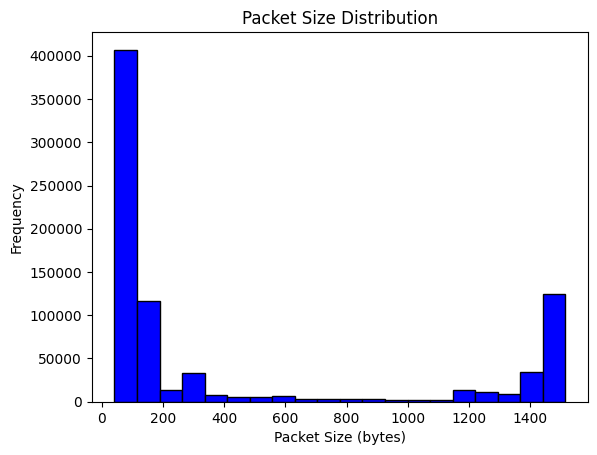

In [ ]:
print(f"Total data transferred: {total_data} bytes")
print(f"Total packets transferred: {len(packets)}")
print(f"Minimum packet size: {min(packet_sizes)} bytes")
print(f"Maximum packet size: {max(packet_sizes)} bytes")
print(f"Average packet size: {sum(packet_sizes) / len(packet_sizes):.2f} bytes")


plt.hist(packet_sizes, bins=20, color='blue', edgecolor='black')
plt.title("Packet Size Distribution")
plt.xlabel("Packet Size (bytes)")
plt.ylabel("Frequency")
plt.show()




In [ ]:
# Q2
unique_flows = {}
for i in all_flows:
    if i not in unique_flows:
        unique_flows[i] = 1
    else:
        unique_flows[i] += 1

filename = 'unique_flows.txt'
with open(filename, "w") as file:
        for value in unique_flows:
            file.write(str(value) + "\n")


In [ ]:
# Q3
filename = 'source_flow_count.txt'
with open(filename, "w") as file:
        for value in src_flow_count:
            file.write(str(value) + " : " + str(src_flow_count[value]) + "\n")

filename = 'destination_flow_count.txt'
with open(filename, "w") as file:
        for value in dst_flow_count:
            file.write(str(value) + " : " + str(dst_flow_count[value]) + "\n")

max_flow = max(flow_data, key=flow_data.get)
print(f"\nSource-destination pair with most data transferred: {max_flow} ({flow_data[max_flow]} bytes)")


Source-destination pair with most data transferred: 172.16.133.95:49358 -> 157.56.240.102:443 (17342229 bytes)


In [ ]:
print(f"Unique flows (source IP:port -> destination IP:port):")
for flow in unique_flows:
    print(flow)


print("\nSource flow counts:")
print(dict(src_flow_count))

print("\nDestination flow counts:")
print(dict(dst_flow_count))

max_flow = max(flow_data, key=flow_data.get)
print(f"\nSource-destination pair with most data transferred: {max_flow} ({flow_data[max_flow]} bytes)")

Streaming output truncated to the last 5000 lines.
172.16.133.85:52495 -> 172.16.139.250:5440
172.16.128.202:53 -> 172.16.133.54:65476
172.16.133.113:55751 -> 172.16.139.250:135
64.214.141.254:None -> 172.16.133.27:None
172.16.133.42:57329 -> 172.16.139.250:5440
172.16.133.113:55752 -> 172.16.139.250:5462
172.16.133.20:62679 -> 172.16.139.250:5440
172.16.133.78:59469 -> 66.103.118.222:36468
202.173.25.200:443 -> 172.16.133.83:57308
172.16.133.28:49392 -> 172.16.139.250:5440
4.69.138.254:None -> 172.16.133.27:None
172.16.133.99:56270 -> 172.16.139.250:5440
172.16.133.75:51183 -> 172.16.139.250:5440
172.16.133.87:60474 -> 172.16.139.250:5440
172.16.133.35:50178 -> 172.16.139.250:5440
172.16.133.116:54023 -> 172.16.139.250:5440
66.103.118.222:36468 -> 172.16.133.78:59469
172.16.133.116:54024 -> 172.16.139.250:5440
172.16.133.84:59018 -> 172.16.139.250:5440
172.16.133.116:54025 -> 172.16.139.250:5440
172.16.133.49:55999 -> 172.16.139.250:5440
172.16.128.233:50951 -> 172.16.133.233:22
172.1

In [ ]:
# Catch me if you can

In [ ]:
from scapy.all import *

# Load the pcap file
packets = rdpcap('5.pcap')

file_name = None
tcp_checksum = None
source_ip = None

for packet in packets:
    if TCP in packet and Raw in packet:
        payload = packet[Raw].load.decode('utf-8', errors='ignore')
        if 'The name of file is = ' in payload:
            print(payload)
            file_name = payload.split('The name of file is = ')[1].split('>')[0]
            tcp_checksum = packet[TCP].chksum
            source_ip = packet[IP].src
            break

print(f"Q1a. File Name: {file_name}")
print(f"Q1b. TCP Checksum: {tcp_checksum}")
print(f"Q1c. Source IP Address: {source_ip}")

if source_ip:
    ip_packet_count = sum(1 for pkt in packets if IP in pkt and pkt[IP].src == source_ip)
    print(f"Q2. Number of packets with IP {source_ip}: {ip_packet_count}")





The name of file is = networking_Questions.pdf
Q1a. File Name: networking_Questions.pdf
Q1b. TCP Checksum: 35409
Q1c. Source IP Address: 10.20.30.200
Q2. Number of packets with IP 10.20.30.200: 30


In [ ]:
from scapy.all import *

pcap_file = "5.pcap"
packets = rdpcap(pcap_file)


In [ ]:

file_name = None
tcp_checksum = None
source_ip = None
target_ip_count = 0
localhost_port = None
localhost_packet_count = 0


for packet in packets:
    if TCP in packet and packet.haslayer(Raw):
        payload = packet[Raw].load.decode(errors="ignore")
        if "Company of phone" in payload:
            print(payload)
            localhost_port = packet[TCP].sport
            break  # Stop after first match

localhost_packet_count = sum(1 for pkt in packets if IP in pkt and pkt[IP].src == "127.0.0.1")


print(f"3a. Port used by localhost: {localhost_port}")
print(f"3b. Number of packets from localhost: {localhost_packet_count}")


Company of phone is = Samsung
3a. Port used by localhost: 1001
3b. Number of packets from localhost: 30
